In [311]:
import numpy as np
import pandas as pd
from pathlib import Path
import plotly.express as px
from numpy.linalg import eig



import warnings
warnings.filterwarnings("ignore") #suppress warnings
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from statsmodels.multivariate.pca import PCA
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [301]:
#Import in Absenteeism at work data
absent_df = pd.read_csv("Absenteeism_at_work.csv",";")
absent_df = absent_df.astype(int)
absent_df.columns = absent_df.columns.to_series().apply(lambda x: x.strip())
absent_df.groupby(['Absenteeism time in hours']).first()


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
Absenteeism time in hours,,,,,,,,,,,,,,,,,,,,
0,36,0,7,3,1,118,13,18,50,239,97,1,1,1,1,0,0,98,178,31
1,3,11,7,4,1,179,51,18,38,239,97,0,1,0,1,0,0,89,170,31
2,3,23,7,4,1,179,51,18,38,239,97,0,1,0,1,0,0,89,170,31
3,34,23,9,2,1,118,10,10,37,241,92,0,1,0,0,0,0,83,172,28
4,11,26,7,3,1,289,36,13,33,239,97,0,1,2,1,0,1,90,172,30
5,15,23,10,5,4,291,31,12,40,253,93,0,1,1,1,0,1,73,171,25
7,10,25,8,2,1,361,52,3,28,205,92,0,1,1,1,0,4,80,172,27
8,10,22,7,6,1,361,52,3,28,239,97,0,1,1,1,0,4,80,172,27
16,20,19,10,5,4,260,50,11,36,253,93,0,1,4,1,0,0,65,168,23


In [302]:
absent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

In [303]:
 # Assign X  (data) multiple linear regression
X = absent_df.drop('Absenteeism time in hours', axis= 1).values
y = absent_df['Absenteeism time in hours'].values
print(X.shape, y.shape)




(740, 20) (740,)


In [304]:
#correlation values
corr = absent_df.corr()
corr['Absenteeism time in hours'].sort_values(ascending=False)

Absenteeism time in hours          1.000000
Height                             0.144420
Son                                0.113756
Age                                0.065760
Social drinker                     0.065067
Transportation expense             0.027585
Hit target                         0.026695
Work load Average/day              0.025056
Month of absence                   0.024345
Service time                       0.019029
Weight                             0.015789
Seasons                           -0.005615
Social smoker                     -0.008936
ID                                -0.017997
Pet                               -0.028277
Education                         -0.046235
Body mass index                   -0.049719
Distance from Residence to Work   -0.088363
Disciplinary failure              -0.124248
Day of the week                   -0.124361
Reason for absence                -0.173116
Name: Absenteeism time in hours, dtype: float64

In [305]:
#Validation training and testing datasets with stratification 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# Create the Linear Regression model object 
model = LogisticRegression(solver='liblinear')

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing dataset
y_pred = model.predict(X_test)

print(f'Fraud Testing Distribution: {len(y_test[y_test == 1]) / 492}')

# Make predictions using the testing dataset
y_pred = model.predict(X_test)

# Create DataFrame of results
df = pd.DataFrame({"Predicted": y_pred, "Actual": y_test})

# Calculate the True Positive & False Negative values
true_positive = len(df[(df['Actual'] == 1) & (df['Predicted'] == 1)])
false_negative = len(df[(df['Actual'] == 1) & (df['Predicted'] == 0)])
print(f'True Positives: {true_positive}')
print(f'False Negatives: {false_negative}')
print(f'Actual Positive Correct: {true_positive/(true_positive + false_negative)}')
print(f'Test Fraud Transactions: {true_positive + false_negative}')

(592, 20) (148, 20) (592,) (148,)
Fraud Testing Distribution: 0.028455284552845527
True Positives: 1
False Negatives: 0
Actual Positive Correct: 1.0
Test Fraud Transactions: 1


In [306]:
# Create a StandardScaler() model and fit it to the training data
scaler = StandardScaler().fit(X_train)

# Transform the training and testing data by using the X_scaler and y_scaler models
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [325]:
# Create, fit and evaluate decision tree model 
clf = DecisionTreeClassifier().fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)


In [326]:
# Print scores
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9628378378378378
Testing Score: 0.40540540540540543


In [327]:
 # Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [328]:
# Make predictions using a fitted model
predictions = model.predict(X_test)
pd.DataFrame({"Predictions" : predictions}).head()


,Predictions
0,-1.871409
1,12.247874
2,5.568402
3,4.562079
4,5.519246


Text(0.5, 1.0, 'Residual Plot')

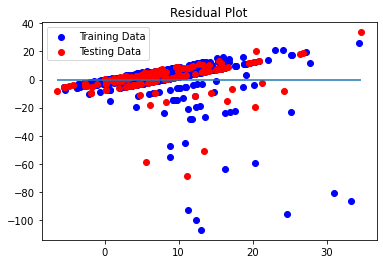

In [236]:
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# predicted values of X training using the model.predict() method 

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(predictions, predictions - y_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")


In [237]:
# Created DataFrame of results
predictions_df = pd.DataFrame({"Predicted": predictions, "Actual": y_test, "Residual": predictions - y_test})
predictions_df.head()

,Predicted,Actual,Residual
0,-1.871409,8,-9.871409
1,12.247874,24,-11.752126
2,5.568402,4,1.568402
3,4.562079,8,-3.437921
4,5.519246,64,-58.480754


In [329]:
#Random Forests
clfs = []
scores = []

for i in range(50):
    
    # Sample the data for each new tree
    X_train_scaled_bootstrap, y_train_bootstrap = resample(X_train_scaled, y_train, random_state=i)
    
    # Create a decision tree and append it to our list of classifiers
    clf = DecisionTreeClassifier(random_state=i+200).fit(X_train_scaled_bootstrap, y_train_bootstrap)
    clfs.append(clf)
    
    # Take the median score of all the created classifiers
    y_preds = [clf.predict(X_test_scaled) for clf in clfs]
    y_pred = pd.DataFrame(y_preds).median().round()
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

In [239]:
 # Visualize the bootstrap decision trees 
plt = px.line(scores,labels={"index":"Bootstrap Iteraton","value":"Testing Accuracy"})
plt.layout.update(showlegend=False)
plt.show()

In [240]:
 # Fit a model and print training and testing scores
clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9628378378378378
Testing Score: 0.5135135135135135


In [241]:
# Get Dummies
X = absent_df.drop('Absenteeism time in hours', axis= 1)
y = absent_df['Absenteeism time in hours']
print(X.shape, y.shape)

 # Now we need to encode our data into numerical features
X = pd.get_dummies(X)
y = [0 if tar == "e" else 1 for tar in y]

(740, 20) (740,)


In [242]:
X

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,11,26,7,3,1,289,36,13,33,239,97,0,1,2,1,0,1,90,172,30
1,36,0,7,3,1,118,13,18,50,239,97,1,1,1,1,0,0,98,178,31
2,3,23,7,4,1,179,51,18,38,239,97,0,1,0,1,0,0,89,170,31
3,7,7,7,5,1,279,5,14,39,239,97,0,1,2,1,1,0,68,168,24
4,11,23,7,5,1,289,36,13,33,239,97,0,1,2,1,0,1,90,172,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264,93,0,1,2,1,0,1,90,172,30
736,1,11,7,3,1,235,11,14,37,264,93,0,3,1,0,0,1,88,172,29
737,4,0,0,3,1,118,14,13,40,271,95,0,1,1,1,0,8,98,170,34
738,8,0,0,4,2,231,35,14,39,271,95,0,1,2,1,0,2,100,170,35


In [243]:
 # Divide the data into traning and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [244]:
 # Create a StandardScaler() model and fit it to the training data
scaler = StandardScaler().fit(X_train)

# Transform the training and testing data by using the X_scaler and y_scaler models
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [245]:
 # Fit a model and print training and testing scores
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 1.0


In [246]:
 # Calculate feature importance from the fitted random forest model
features = clf.feature_importances_
print(features)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [247]:
 # Visualize the feature importance 
px.bar(x=X.columns, y=features,labels={"x":"Features","y":"Score Features"})

In [248]:
#VIF
# Create `X` and `y` datasets
X = absent_df.drop(columns='Absenteeism time in hours')
y = absent_df['Absenteeism time in hours']

In [249]:

from pandas_profiling import ProfileReport
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [250]:
# Print independent variables and their VIF values
for i in range(X.shape[1]):
    print(X.columns[i], variance_inflation_factor(X.values, i))

ID 8.178543005131813
Reason for absence 9.689381873162477
Month of absence 7.657509781863973
Day of the week 9.365049881936578
Seasons 8.710107300253416
Transportation expense 21.91247718887995
Distance from Residence to Work 13.124242791908236
Service time 33.067875855843674
Age 92.3714164645912
Work load Average/day 60.21548428736553
Hit target 864.9359920318786
Disciplinary failure 1.6173927583026784
Education 8.303628807773881
Son 2.5916584994194753
Social drinker 6.415010660937791
Social smoker 1.3739648078483455
Pet 2.3115603711510038
Weight 676.8597462216206
Height 1284.2992618500564
Body mass index 606.1665596969879


In [251]:
# Create a function to calculate VIF values
def vif_values(X):

    # Create a DataFrame of VIF values
    df = pd.DataFrame()
    df["variables"] = X.columns
    df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return(df)

In [33]:
# Print independent variables and their VIF values
print(X.columns[0], variance_inflation_factor(X.values, 0))
print(X.columns[1], variance_inflation_factor(X.values, 1))
print(X.columns[2], variance_inflation_factor(X.values, 2))
print(X.columns[3], variance_inflation_factor(X.values, 3))
print(X.columns[4], variance_inflation_factor(X.values, 4))
print(X.columns[5], variance_inflation_factor(X.values, 5))
print(X.columns[6], variance_inflation_factor(X.values, 6))
print(X.columns[7], variance_inflation_factor(X.values, 7))
print(X.columns[8], variance_inflation_factor(X.values, 8))
print(X.columns[9], variance_inflation_factor(X.values, 9))
print(X.columns[10], variance_inflation_factor(X.values,10))
print(X.columns[11], variance_inflation_factor(X.values,11))
print(X.columns[12], variance_inflation_factor(X.values,12))
print(X.columns[13], variance_inflation_factor(X.values,13))
print(X.columns[14], variance_inflation_factor(X.values,14))
print(X.columns[15], variance_inflation_factor(X.values,15))
print(X.columns[16], variance_inflation_factor(X.values,16))
print(X.columns[17], variance_inflation_factor(X.values,17))
print(X.columns[18], variance_inflation_factor(X.values,18))
print(X.columns[19], variance_inflation_factor(X.values,19))


ID 8.178543005131813
Reason for absence 9.689381873162477
Month of absence 7.657509781863973
Day of the week 9.365049881936578
Seasons 8.710107300253416
Transportation expense 21.91247718887995
Distance from Residence to Work 13.124242791908236
Service time 33.067875855843674
Age 92.3714164645912
Work load Average/day 60.21548428736553
Hit target 864.9359920318786
Disciplinary failure 1.6173927583026784
Education 8.303628807773881
Son 2.5916584994194753
Social drinker 6.415010660937791
Social smoker 1.3739648078483455
Pet 2.3115603711510038
Weight 676.8597462216206
Height 1284.2992618500564
Body mass index 606.1665596969879


In [34]:
 # Print a DataFrame of the VIF vlaues
vif_values(X)

,variables,VIF
0,ID,8.178543
1,Reason for absence,9.689382
2,Month of absence,7.657510
3,Day of the week,9.365050
4,Seasons,8.710107
5,Transportation expense,21.912477
6,Distance from Residence to Work,13.124243
7,Service time,33.067876
8,Age,92.371416
9,Work load Average/day,60.215484


In [252]:
 # Drop the highest VIF as they explain the same variance witihin the dataset and recalculate the VIF values
# Repeat until all VIF values are less than 5
X = X.drop(columns=['Height','Hit target','Weight'])
vif_values(X)



,variables,VIF
0,ID,6.747469
1,Reason for absence,9.065180
2,Month of absence,5.703921
3,Day of the week,9.315405
4,Seasons,8.306239
5,Transportation expense,19.297247
6,Distance from Residence to Work,8.800418
7,Service time,32.506476
8,Age,83.713869
9,Work load Average/day,39.586493


In [253]:
# # Created a function to calculate VIF values
def vif_values(X):

    for i in range(X.shape[1]):
        
        # Create a DataFrame of VIF values
        df = pd.DataFrame()
        df["variables"] = X.columns
        df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        df.sort_values('VIF', ascending=False, inplace=True, ignore_index=True)
        if df["VIF"][0] > 100:
            X = X.drop(columns=[df["variables"][0]])   
            print(f'Dropped: {df["variables"][0]}; VIF: {df["VIF"][0]}')
    
    return(X, df)

In [254]:
# Recreate the X dataset and use a function to calculate VIF values and drop features until all are below 5.
# X = airline_df.drop(columns=['satisfaction'])
X = absent_df.drop(columns=['Absenteeism time in hours'])

X_df, vif_df = vif_values(X)

Dropped: Height; VIF: 1284.2992618500564
Dropped: Body mass index; VIF: 388.2652487964134
Dropped: Hit target; VIF: 194.46955969837953


In [255]:
 # Preview the new X dataset
X_df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight
0,11,26,7,3,1,289,36,13,33,239,0,1,2,1,0,1,90
1,36,0,7,3,1,118,13,18,50,239,1,1,1,1,0,0,98
2,3,23,7,4,1,179,51,18,38,239,0,1,0,1,0,0,89
3,7,7,7,5,1,279,5,14,39,239,0,1,2,1,1,0,68
4,11,23,7,5,1,289,36,13,33,239,0,1,2,1,0,1,90


In [256]:
 # Preview the new X dataset VIF values
#values moderately correlated to absenteeism at work
vif_df

,variables,VIF
0,Age,76.143709
1,Weight,54.447690
2,Work load Average/day,41.694969
3,Service time,32.691729
4,Transportation expense,18.996957
5,Day of the week,9.318070
6,Distance from Residence to Work,9.078913
7,Reason for absence,8.955533
8,Seasons,8.315008
9,ID,6.630756


In [40]:
 # Drop the highest VIF as they explain the same variance witihin the dataset and recalculate the VIF values
# Repeat until all VIF values are less than 5
X = X.drop(columns=['Service time','Work load Average/day','Transportation expense'])
vif_values(X)


Dropped: Height; VIF: 999.2953109921444
Dropped: Body mass index; VIF: 372.14196046160424
Dropped: Hit target; VIF: 140.43261293677674


(     ID  Reason for absence  Month of absence  Day of the week  Seasons  \
 0    11                  26                 7                3        1   
 1    36                   0                 7                3        1   
 2     3                  23                 7                4        1   
 3     7                   7                 7                5        1   
 4    11                  23                 7                5        1   
 ..   ..                 ...               ...              ...      ...   
 735  11                  14                 7                3        1   
 736   1                  11                 7                3        1   
 737   4                   0                 0                3        1   
 738   8                   0                 0                4        2   
 739  35                   0                 0                6        3   
 
      Distance from Residence to Work  Age  Disciplinary failure  Education  \
 0     

In [41]:
 # Preview the new X dataset
X_df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight
0,11,26,7,3,1,289,36,13,33,239,0,1,2,1,0,1,90
1,36,0,7,3,1,118,13,18,50,239,1,1,1,1,0,0,98
2,3,23,7,4,1,179,51,18,38,239,0,1,0,1,0,0,89
3,7,7,7,5,1,279,5,14,39,239,0,1,2,1,1,0,68
4,11,23,7,5,1,289,36,13,33,239,0,1,2,1,0,1,90


In [48]:
# # Created a function to calculate VIF values
def vif_values(X):

    for i in range(X.shape[1]):
        
        # Create a DataFrame of VIF values
        df = pd.DataFrame()
        df["variables"] = X.columns
        df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        df.sort_values('VIF', ascending=False, inplace=True, ignore_index=True)
        if df["VIF"][0] > 5:
            X = X.drop(columns=[df["variables"][0]])   
            print(f'Dropped: {df["variables"][0]}; VIF: {df["VIF"][0]}')
    
    return(X, df)

In [54]:
 # Preview the new X dataset
X_df.head()

,ID,Month of absence,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Absenteeism time in hours
0,11,7,0,1,2,1,0,1,4
1,36,7,1,1,1,1,0,0,0
2,3,7,0,1,0,1,0,0,2
3,7,7,0,1,2,1,1,0,4
4,11,7,0,1,2,1,0,1,2


In [55]:
 # Preview the new X dataset VIF values
#values moderately correlated to absenteeism at work
vif_df

,variables,VIF
0,Month of absence,3.977204
1,Education,2.981527
2,ID,2.914516
3,Social drinker,2.183285
4,Son,2.122344
5,Pet,1.330143
6,Absenteeism time in hours,1.306847
7,Social smoker,1.148936
8,Disciplinary failure,1.113375


In [125]:
#PCA

# Run Principal Component Analysis
# Standardize set to True to standardize and create covariance matrix
# Method set to `eig` to perform eigendecomposition
pca = PCA(X, standardize=True, method='eig')
components_df = pca.factors

In [126]:
# Preview the principal components 
components_df.head()

,comp_00,comp_01,comp_02,comp_03,comp_04,comp_05,comp_06,comp_07,comp_08,comp_09,comp_10,comp_11,comp_12,comp_13,comp_14,comp_15,comp_16,comp_17,comp_18,comp_19
0,0.021607,-0.032357,-0.032132,0.005802,-0.031354,-0.003109,0.014840,0.047120,0.000766,0.015065,-0.012198,-0.020462,0.032106,-0.007750,-0.010535,-0.042449,0.022839,0.004976,-0.045488,0.037632
1,0.054289,0.054060,0.085781,0.059079,-0.033797,0.043493,0.003076,0.022629,0.029400,0.103029,-0.015714,0.047021,-0.017122,0.049998,0.038560,-0.094368,0.028895,-0.017308,-0.046863,0.017428
2,0.050511,-0.009583,-0.047875,-0.005839,-0.001397,0.035030,-0.020916,0.002615,-0.006956,0.015393,-0.003539,0.028589,-0.005808,-0.011928,-0.027347,-0.051791,0.005042,0.010213,-0.003795,-0.017635
3,-0.007290,-0.010947,0.013353,0.093455,0.039053,0.030943,-0.021882,0.074424,-0.025263,-0.017167,0.021935,0.012692,0.030808,-0.108737,-0.060677,0.008964,-0.081886,-0.082860,-0.065735,0.025903
4,0.020268,-0.034744,-0.030955,0.011302,-0.016406,-0.008434,0.002236,0.037583,0.026575,0.030175,0.021671,-0.014896,0.026437,-0.021085,-0.031420,-0.033935,0.013745,0.004422,-0.044844,0.034090


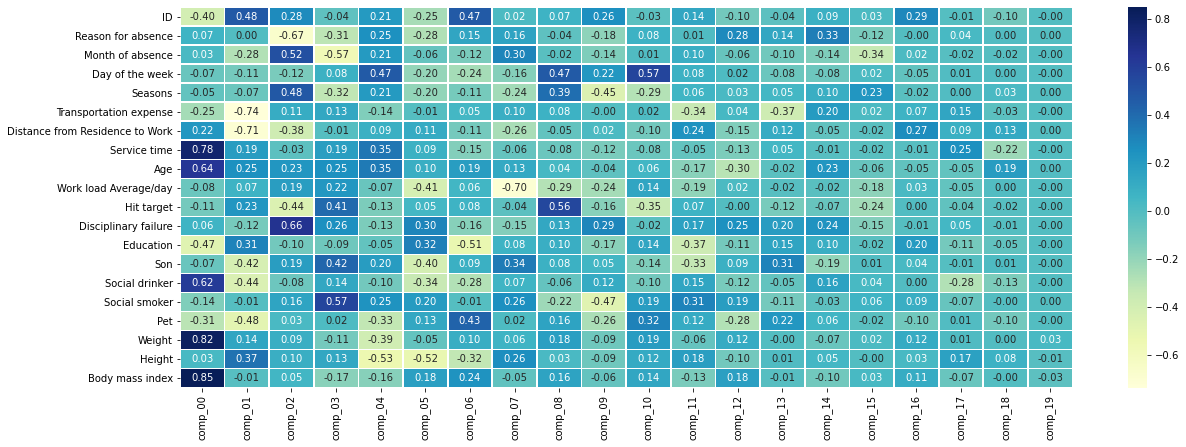

In [134]:
 # Combine the X varaibles and new principal compenents
combined_df = pd.concat([X, components_df], axis=1)

# Create a correlation matrix of all X variables and principal components
correlation = combined_df.corr()

# Creat a matrix showing the correlation between:
# Features vs Principal Components
# Remove the parts of the output to keep the correlation between features and principal components
# Keep Rows up till components: correlation[:-len(components_df.columns)]
# Keep Columns starting with compenents: .loc[:, 'comp_00':]
correlation_plot_data = correlation[:-len(components_df.columns)].loc[:, 'comp_00':]

# Plot Features vs Principal Components correlation matrix
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(correlation_plot_data, cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()

In [129]:
# Loadings dataset
loadings = pca.loadings
print(loadings)

                                  comp_00   comp_01   comp_02   comp_03  \
ID                              -0.214869  0.307822  0.196600 -0.033675   
Reason for absence               0.037097  0.002009 -0.473891 -0.251805   
Month of absence                 0.015102 -0.182532  0.363517 -0.462139   
Day of the week                 -0.038667 -0.070901 -0.087512  0.066862   
Seasons                         -0.029380 -0.048399  0.340733 -0.256925   
Transportation expense          -0.132129 -0.476213  0.075608  0.109657   
Distance from Residence to Work  0.118602 -0.455691 -0.266853 -0.006183   
Service time                     0.419139  0.125271 -0.024154  0.152091   
Age                              0.345485  0.163273  0.159194  0.207209   
Work load Average/day           -0.042018  0.046428  0.132531  0.178913   
Hit target                      -0.057173  0.146380 -0.310298  0.332299   
Disciplinary failure             0.034434 -0.074604  0.464210  0.211323   
Education                

In [332]:
# Print Eigen Values for Kaiser Criterion
eigen_values = pd.DataFrame(data=pca.eigenvals.values, columns=['eigenvalue'])
eigen_values.head()

,eigenvalue
0,2548.406259
1,1773.587198
2,1492.514214
3,1116.618086
4,1040.970681


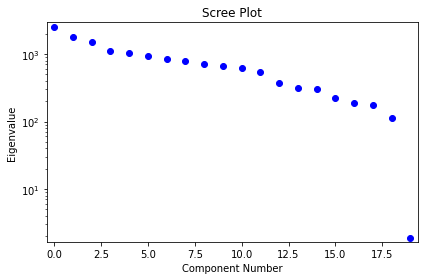

In [131]:
# Create a Scree Plot
pca.plot_scree()
plt.show()

In [132]:
 # Cumulative Variance Explained
cumulative_variance_explained = pd.DataFrame(data=pca.rsquare.values, columns=['cumulative_var'])
print(cumulative_variance_explained)

    cumulative_var
0         0.000000
1         0.172190
2         0.292027
3         0.392872
4         0.468319
5         0.538655
6         0.601286
7         0.658692
8         0.712752
9         0.761051
10        0.806563
11        0.848513
12        0.885703
13        0.910524
14        0.932061
15        0.952422
16        0.967662
17        0.980524
18        0.992312
19        0.999871
20        1.000000


In [186]:
###Another try
X = absent_df.drop('Absenteeism time in hours', axis= 1).values
y = absent_df['Absenteeism time in hours'].values

X = StandardScaler().fit_transform(X)


In [187]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 101)

In [188]:
#fit model and calculate for accuracy
model = RandomForestClassifier(random_state=101).fit(X_train,y_train)

predictionforest = model.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc1 = accuracy_score(y_test,predictionforest)

[[10  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9 12  2  1  0  4  0  0  0  0  0  0  0  0]
 [ 0  8 21  5  6  0  2  0  0  0  0  0  0  0  0]
 [ 0  4  6 11  2  0  5  1  1  0  0  0  0  0  1]
 [ 0  1  3  3  7  1  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  6  8  3  1 48  0  1  1  0  0  1  0  0]
 [ 0  2  1  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.33      0.32      0.33        28
           2       0.43      0.50      0.46        42
           3       0.35      0.35      0.35        31
        

In [295]:
# #ANN-Artificial Neural Network
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def DL_Model(activation= 'linear', neurons= 5, optimizer='Adam'):
    model = Sequential()
    model.add(Dense(neurons, input_dim= 20, activation= activation))
    model.add(Dense(neurons, activation= activation))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['accuracy'])
    return model

# Definying grid parameters
activation = ['softmax', 'relu', 'tanh', 'sigmoid', 'linear']
neurons = [5, 10, 15, 25, 35, 50]
optimizer = ['SGD', 'Adam', 'Adamax']
param_grid = dict(activation = activation, neurons = neurons, optimizer = optimizer)

clf = KerasClassifier(build_fn= DL_Model, epochs= 80, batch_size=40, verbose= 0)

model = GridSearchCV(estimator= clf, param_grid=param_grid, n_jobs=-1)
model.fit(X_train,y_train).reshape(1,20)

print("Max Accuracy Registred: {} using {}".format(round(model.best_score_,3), 
                                                   model.best_params_))

ValueError: in user code:

    /Users/debo/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /Users/debo/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/debo/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/debo/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/debo/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/debo/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /Users/debo/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /Users/debo/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/debo/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_4 is incompatible with the layer: expected axis -1 of input shape to have value 20 but received input with shape (None, 2)


In [ ]:
predictionforest = model.predict(X_test)
print(confusion_matrix(y_yest,predictionforest))
print(classification_report(y_test,predictionforest))
acc7 = accuracy_score(y_Test,predictionforest)

In [ ]:
#trying to optimize score using random search 
from sklearn.model_selection import RandomizedSearchCV

# # random_search = {'Criterion':['entropy','gini'],
# #                 'max_depth': list(np.linspace(10,1200,10, dtype=int)) + [None],
# #                 'max_features': ['auto','sqrt','log2',None],
# #                 'min_samples_leaf': [4,6,8,12],
# #                 'min_samples_split': [5,7,10,14],                
# #                 'n_estimators': list(np.linspace(151,1200,10, dtype=int))}

# absent_df = load_absent_df()
# logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200, random_state=0)
# distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])

# clf = RandomizedSearchCV(logistic, distributions, random_state=0)
# search = clf.fit(iris.data, iris.target)
# search.best_params_
# {'C': 2..., 'penalty': 'l1'}

In [333]:
# clf = RandomForestClassifier()
# model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 80, 
#                                cv = 4, verbose= 5, random_state= 101, n_jobs = -1)
# model.fit(X_train,y_train)

In [257]:
#K fold validation
#Defining dataset
X = absent_df.iloc[:, [0,18]]
y = absent_df.iloc[:,19]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

In [258]:
#10 fold cross validation
#prints the indexs of training and testing sets for each iteration
from sklearn.svm import SVR
scores = []
best_svr=SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=None,shuffle=False)

for train_index, test_index in cv.split(X):
    print("Train Index: ",
          train_index, "\n")
    print("Test Index: ",
         test_index)
    
    X_train, X_test, y_train, y_test = X[train_index],X[test_index],y[train_index],y[test_index]
    best_svr.fit(X_train,y_train)
    
    scores.append(best_svr.score(X_test, y_test))
    

Train Index:  [ 74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 315 316 

Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 315 316 

Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 

Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 

In [261]:
#training the model through each iteration which provides an r2 score
best_svr.fit(X_train, y_train)

scores.append(best_svr.score(X_test,y_test))

In [262]:
#list avg of score
print(np.mean(scores))

0.696015218067238


In [263]:
#list of r2 scores
cross_val_score(best_svr,X,y,cv=10)

array([0.74206042, 0.63910794, 0.56904301, 0.65749243, 0.74512726,
       0.78981   , 0.65746426, 0.73687264, 0.75742489, 0.68844875])

In [264]:
cross_val_predict(best_svr,X,y,cv=10)

array([27.53879875, 30.89996492, 30.8995974 , 31.67632668, 27.53879875,
       30.8995974 , 28.13292263, 22.89973251, 25.10025434, 29.09993457,
       22.89973251, 22.89973251, 22.89973251, 30.8995974 , 30.8995974 ,
       21.58156577, 30.8995974 , 30.8995974 , 32.3783658 , 31.01235156,
       24.89951378, 30.8995974 , 28.13292263, 22.89973251, 27.53879875,
       28.13292263, 27.53879875, 29.07865389, 27.53879875, 30.8995974 ,
       30.8995974 , 33.09959721, 29.09993457, 33.09959721, 30.8995974 ,
       28.13292263, 27.53879875, 22.80656196, 33.09959721, 22.89973251,
       24.89851269, 28.09992028, 30.8995974 , 32.54104802, 25.10025434,
       28.09992028, 30.8995974 , 24.90030851, 22.89973251, 24.90030851,
       22.89973251, 24.86392046, 24.10035132, 28.09992028, 27.53879875,
       30.89996492, 24.10035132, 30.8995974 , 27.38144979, 31.01235156,
       30.8995974 , 22.89973251, 30.8995974 , 28.09992028, 30.89996492,
       21.15255233, 30.8995974 , 24.10035132, 28.09992028, 24.10